# Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно ответить на вопросы - влияет ли семейное положение и количество детей клиента на погашение кредита в срок. Входные данные — банковская статистика клиентов.

Результаты исследования повлияют на модель **кредитного скоринга**, которая будет оцениввать способность потенциального заёмщика вернуть кредит банку.

## Общая информация

In [2]:
import pandas as pd
import numpy as np
try:
    df = pd.read_csv('/datasets/data.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

In [82]:
#Откроем таблицу
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group,income_median,debt_group,income_group
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,жилье,средний возраст,166571.732985,надёжный заёмщик,выше среднего
1,2,6929,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,свадьба,средний возраст,166571.732985,надёжный заёмщик,ниже среднего
2,0,2369,33,высшее,0,гражданский брак,1,M,сотрудник,0,90410,недвижимость,средний возраст,166571.732985,надёжный заёмщик,ниже среднего
3,0,529,28,высшее,0,женат / замужем,0,M,сотрудник,0,308848,недвижимость,средний возраст,166571.732985,надёжный заёмщик,высокий
4,1,717,26,высшее,0,женат / замужем,0,F,сотрудник,0,187863,недвижимость,средний возраст,166571.732985,надёжный заёмщик,средний


In [4]:
#смотрим подробности о таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Видно, что в колонках "days_employed" и "total_income" есть пропуски

In [5]:
#посмотрим предварительно на пропуски в колонке "total_income"
df.loc[df['total_income'].isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Среднее,1,женат / замужем,0,M,компаньон,0,NaN,сделка с автомобилем
21495,1,NaN,50,среднее,1,гражданский брак,1,F,сотрудник,0,NaN,свадьба
21497,0,NaN,48,ВЫСШЕЕ,0,женат / замужем,0,F,компаньон,0,NaN,строительство недвижимости
21502,1,NaN,42,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,строительство жилой недвижимости


In [6]:
#посмотрим предварительно на пропуски в колонке "days_employed"
df.loc[df['days_employed'].isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Среднее,1,женат / замужем,0,M,компаньон,0,NaN,сделка с автомобилем
21495,1,NaN,50,среднее,1,гражданский брак,1,F,сотрудник,0,NaN,свадьба
21497,0,NaN,48,ВЫСШЕЕ,0,женат / замужем,0,F,компаньон,0,NaN,строительство недвижимости
21502,1,NaN,42,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,строительство жилой недвижимости


Есть гипотеза, что люди с пропусками в колонке "total_income" имеют пропуски и в колонке "days_employed"

In [7]:
#выберем те строки в которых одновременно пропущены значения в обеих колонках
df.loc[(df['total_income'].isna()) & (df['days_employed'].isna())]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Среднее,1,женат / замужем,0,M,компаньон,0,NaN,сделка с автомобилем
21495,1,NaN,50,среднее,1,гражданский брак,1,F,сотрудник,0,NaN,свадьба
21497,0,NaN,48,ВЫСШЕЕ,0,женат / замужем,0,F,компаньон,0,NaN,строительство недвижимости
21502,1,NaN,42,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,строительство жилой недвижимости


Количество пропущенных строк в каждой отдельной колонке и в таблице с объединённым условием равны. Получается, что в нашей таблице пропуски в обеих колонках встречаются в одних и тех же строках. 
Интересно определить зависят ли эти пропуски от какой-то конкретной категории заёмщиков или распределены равномерно.

Посмотрим предварительно категории. Сколько их в колонках "education", "family_status", "income_type", "purpose". Не дублируются ли они неявным образом, что может сказаться на последующих группировках.

In [8]:
categories = ['education', 'family_status', 'income_type', 'purpose']
for cat in categories:
    print(cat)
    display(df[cat].value_counts())
    print()

education


среднее                13750
высшее                  4718
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   274
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
УЧЕНАЯ СТЕПЕНЬ             1
Ученая степень             1
Name: education, dtype: int64


family_status


женат / замужем          12380
гражданский брак          4177
Не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64


income_type


сотрудник          11119
компаньон           5085
пенсионер           3856
госслужащий         1459
предприниматель        2
безработный            2
студент                1
в декрете              1
Name: income_type, dtype: int64


purpose


свадьба                                   797
на проведение свадьбы                     777
сыграть свадьбу                           774
операции с недвижимостью                  676
покупка коммерческой недвижимости         664
операции с жильем                         653
покупка жилья для сдачи                   653
операции с коммерческой недвижимостью     651
покупка жилья                             647
жилье                                     647
покупка жилья для семьи                   641
строительство собственной недвижимости    635
недвижимость                              634
операции со своей недвижимостью           630
строительство жилой недвижимости          626
покупка недвижимости                      624
покупка своего жилья                      620
строительство недвижимости                620
ремонт жилью                              612
покупка жилой недвижимости                607
на покупку своего автомобиля              505
заняться высшим образованием      

Прикинем количество дубликатов по строкам. Однако имеем в виду, что их может быть и больше по причине наличия неявных дубликатов в категориях.

In [9]:
df.duplicated().sum()

54

**Вывод**

Первый взгляд на данные выявил пропуски в двух колонках. Причём пропуски встречаются у одних и тех же людей. Скорей всего, эти пропуски не являются случайными. Их количество навскидку составляет порядка 10%, так что удалять пропуски нежелательно, предпочтительнее их заполнить. 

В колонке "days_employed" встречаются отрицательные значения.

В колонках с категориями "education" и "purpose" есть неявные дубликаты. И если вместо колонки "education" данные можно группировать по дублирующей её колонке "education_id", то колонку "purpose" надо будет дополнительно лемматизировать.

## Предобработка данных

### Обработка пропусков

Рассмотрим сперва пропуски в колонке "total_income"

In [12]:
df.loc[df['total_income'].isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Среднее,1,женат / замужем,0,M,компаньон,0,NaN,сделка с автомобилем
21495,1,NaN,50,среднее,1,гражданский брак,1,F,сотрудник,0,NaN,свадьба
21497,0,NaN,48,ВЫСШЕЕ,0,женат / замужем,0,F,компаньон,0,NaN,строительство недвижимости
21502,1,NaN,42,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,строительство жилой недвижимости


Попробуем сгруппировать данные по 4 ранее описанным категориям "education", "family_status", "income_type", "purpose", прежде устранив неявные дубликаты в категории "education"

In [13]:
#приводим все категории в колонке  "education" к единому виду
df['education'] = df['education'].str.lower()
#проверяем уникальные значения в категориях колонки "education"
df['education'].unique()

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

Сгруппируем данные с пропусками в колонке "total_income" по категориям "education", "family_status", "income_type"

In [14]:
#группировка данных
for col in categories:
    display(df.loc[df['total_income'].isna()].groupby(col).count())

,children,days_employed,dob_years,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
education,,,,,,,,,,,
высшее,544,0,544,544,544,544,544,544,544,0,544
начальное,21,0,21,21,21,21,21,21,21,0,21
неоконченное высшее,69,0,69,69,69,69,69,69,69,0,69
среднее,1540,0,1540,1540,1540,1540,1540,1540,1540,0,1540


,children,days_employed,dob_years,education,education_id,family_status_id,gender,income_type,debt,total_income,purpose
family_status,,,,,,,,,,,
Не женат / не замужем,288,0,288,288,288,288,288,288,288,0,288
в разводе,112,0,112,112,112,112,112,112,112,0,112
вдовец / вдова,95,0,95,95,95,95,95,95,95,0,95
гражданский брак,442,0,442,442,442,442,442,442,442,0,442
женат / замужем,1237,0,1237,1237,1237,1237,1237,1237,1237,0,1237


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,debt,total_income,purpose
income_type,,,,,,,,,,,
госслужащий,147,0,147,147,147,147,147,147,147,0,147
компаньон,508,0,508,508,508,508,508,508,508,0,508
пенсионер,413,0,413,413,413,413,413,413,413,0,413
предприниматель,1,0,1,1,1,1,1,1,1,0,1
сотрудник,1105,0,1105,1105,1105,1105,1105,1105,1105,0,1105


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income
purpose,,,,,,,,,,,
автомобили,57,0,57,57,57,57,57,57,57,57,0
автомобиль,41,0,41,41,41,41,41,41,41,41,0
высшее образование,40,0,40,40,40,40,40,40,40,40,0
дополнительное образование,48,0,48,48,48,48,48,48,48,48,0
жилье,60,0,60,60,60,60,60,60,60,60,0
заняться высшим образованием,56,0,56,56,56,56,56,56,56,56,0
заняться образованием,55,0,55,55,55,55,55,55,55,55,0
на покупку автомобиля,30,0,30,30,30,30,30,30,30,30,0
на покупку подержанного автомобиля,42,0,42,42,42,42,42,42,42,42,0


Группировка показала, что пропуски в данных по большей части имеются у людей со средним образованием, состоящих в браке и принадлежащих категории "сотрудник". 

Логично предположить, что доход человека в большей степени зависит от его занятий, чем от образования, тем не менее для более точного попадания можно выделить группы доходов по нескольким категориям. 

Давайте в заменим пропуски в колонке "total_income" по медианным значениям (чтобы уйти от излишнего разброса) сгруппировав заёмщиков по трём категориям - "income_type", "education", "age_group". Для этого нам потребуется категоризовать колонку "dob_years" чуть раньше по проекту. 

In [15]:
#Создание функции категоризации по возрасту
def age_group(age):
    if age <= 24:
        return 'молодой возраст'
    if 25 < age <= 45:
        return 'средний возраст'
    if 46 < age <= 64:
        return 'старший возраст'    
    return 'пожилой возраст'

In [16]:
#Применим функцию к столбцу "dob_years", получив дополнительный столбец "age_group" с возрастными категориями
df['age_group'] = df['dob_years'].apply(age_group)

In [17]:
#Посмотрим что вышло
df.head(15)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,средний возраст
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,средний возраст
2,0,-5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,средний возраст
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,средний возраст
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,старший возраст
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья,средний возраст
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем,средний возраст
7,0,-152.779569,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование,старший возраст
8,2,-6929.865299,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы,средний возраст
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи,средний возраст


Для наших целей создадим отдельную таблицу из группировки датафрейма по трём столбцам - "income_type", "age_group", "education" и найдём медианы для этой группировки 

In [18]:
#Создание таблицы из группировки медиан по трём столбцам 
itage = df.groupby(['income_type', 'age_group', 'education'])['total_income'].median().reset_index()

In [19]:
#Проверим что вышло
itage

,income_type,age_group,education,total_income
0,безработный,средний возраст,высшее,202722.511368
1,безработный,средний возраст,среднее,59956.991984
2,в декрете,средний возраст,среднее,53829.130729
3,госслужащий,молодой возраст,высшее,153859.652436
4,госслужащий,молодой возраст,неоконченное высшее,133110.642705
...,...,...,...,...
66,сотрудник,старший возраст,начальное,130600.077985
67,сотрудник,старший возраст,неоконченное высшее,169501.718987
68,сотрудник,старший возраст,среднее,135640.445243
69,сотрудник,старший возраст,ученая степень,268411.214536


In [20]:
#Переименуем колонку "total_income" в "income_median"
itage = itage.rename(columns={'total_income':'income_median'})
itage

,income_type,age_group,education,income_median
0,безработный,средний возраст,высшее,202722.511368
1,безработный,средний возраст,среднее,59956.991984
2,в декрете,средний возраст,среднее,53829.130729
3,госслужащий,молодой возраст,высшее,153859.652436
4,госслужащий,молодой возраст,неоконченное высшее,133110.642705
...,...,...,...,...
66,сотрудник,старший возраст,начальное,130600.077985
67,сотрудник,старший возраст,неоконченное высшее,169501.718987
68,сотрудник,старший возраст,среднее,135640.445243
69,сотрудник,старший возраст,ученая степень,268411.214536


Применим метод merge для слияния двух таблиц по трём колонкам. В результирующую таблицу добавится колонка "income_median" в которой будет содержаться медианный доход каждого заёмщика  согласно совпадению по трём  вышеописанным категориям.

In [21]:
#Применяем метод merge для слияния таблиц df и itage 
df = df.merge(itage,on=['income_type', 'age_group', 'education'])

In [22]:
#Проверим что вышло
df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group,income_median
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,средний возраст,166571.732985
1,2,-6929.865299,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы,средний возраст,166571.732985
2,0,-2369.999720,33,высшее,0,гражданский брак,1,M,сотрудник,0,90410.586745,строительство недвижимости,средний возраст,166571.732985
3,0,-529.191635,28,высшее,0,женат / замужем,0,M,сотрудник,0,308848.983691,строительство собственной недвижимости,средний возраст,166571.732985
4,1,-717.274324,26,высшее,0,женат / замужем,0,F,сотрудник,0,187863.237306,строительство собственной недвижимости,средний возраст,166571.732985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,0,376276.219531,62,ученая степень,4,женат / замужем,0,F,пенсионер,0,255425.196556,покупка жилой недвижимости,старший возраст,255425.196556
21521,0,395302.838654,45,высшее,0,гражданский брак,1,F,безработный,0,202722.511368,ремонт жилью,средний возраст,202722.511368
21522,0,-1331.017371,22,начальное,3,гражданский брак,1,M,компаньон,0,169493.899228,свадьба,молодой возраст,169493.899228
21523,0,-520.848083,27,высшее,0,гражданский брак,1,F,предприниматель,0,499163.144947,на проведение свадьбы,средний возраст,499163.144947


In [23]:
#Проверим как выглядит таблица с колонкой "income_median" для заёмщиков с пропусками 
df.loc[df['total_income'].isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group,income_median
9,2,NaN,35,высшее,0,женат / замужем,0,F,сотрудник,0,NaN,операции с жильем,средний возраст,166571.732985
20,1,NaN,31,высшее,0,женат / замужем,0,F,сотрудник,0,NaN,на покупку подержанного автомобиля,средний возраст,166571.732985
42,1,NaN,30,высшее,0,гражданский брак,1,M,сотрудник,0,NaN,сыграть свадьбу,средний возраст,166571.732985
52,1,NaN,34,высшее,0,гражданский брак,1,M,сотрудник,0,NaN,сыграть свадьбу,средний возраст,166571.732985
55,0,NaN,45,высшее,0,женат / замужем,0,M,сотрудник,0,NaN,покупка жилой недвижимости,средний возраст,166571.732985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21498,0,NaN,0,высшее,0,в разводе,3,F,пенсионер,0,NaN,покупка жилой недвижимости,молодой возраст,137674.117012
21502,0,NaN,58,высшее,0,женат / замужем,0,M,предприниматель,0,NaN,покупка жилой недвижимости,старший возраст,NaN
21510,0,NaN,67,неоконченное высшее,2,Не женат / не замужем,4,F,пенсионер,0,NaN,на покупку своего автомобиля,пожилой возраст,123687.093680
21515,1,NaN,25,неоконченное высшее,2,женат / замужем,0,F,госслужащий,0,NaN,покупка жилой недвижимости,пожилой возраст,137395.348010


Заполним пропуски в колонке "total_income" медианами из колонки "income_median"

In [24]:
#Используем метод fillna() для заполнения пропусков, указав источником данных колонку "income_median"
df['total_income'] = df['total_income'].fillna(df['income_median'])

In [25]:
#Проверим не осталось ли вдруг пропусков
df.loc[df['total_income'].isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group,income_median
21502,0,NaN,58,высшее,0,женат / замужем,0,M,предприниматель,0,NaN,покупка жилой недвижимости,старший возраст,NaN


Оказывается есть уникальный заёмщик у которого в категории нет медианы, поскольку он там один. 

In [26]:
#Проверим что там у нас вообще происходит в категории "предприниматель"
df.loc[df['income_type'] == 'предприниматель']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group,income_median
21502,0,NaN,58,высшее,0,женат / замужем,0,M,предприниматель,0,NaN,покупка жилой недвижимости,старший возраст,NaN
21523,0,-520.848083,27,высшее,0,гражданский брак,1,F,предприниматель,0,499163.144947,на проведение свадьбы,средний возраст,499163.144947


Хм, ситуация интересная. Всего два предпринимателя в нашей таблице, и у одного не указан доход.

In [27]:
#Внимательный взгляд на предыдущие результаты применения метода describe() выявили бы интересноею Цифры в колонках одни и те же.
display('предприниматель', df[df['income_type'] == 'предприниматель'][['total_income']].describe([.001,.1,.95]).T)

'предприниматель'

,count,mean,std,min,0.1%,10%,50%,95%,max
total_income,1.0,499163.144947,NaN,499163.144947,499163.144947,499163.144947,499163.144947,499163.144947,499163.144947


Ну что ж, терять 50% предпринимателей мы не имеем права. Раз такой заёмщик есть, и он, судя по колонке "debt" является надёжным заёмщиком, определим ему доход такой же как и у второго предпринимателя. Я бы не назвал эту выборку репрезентативной, но других предпринимателей у датасета для нас нет. 

In [28]:
#Заменяем пропущенные значения в колонке "total_income" для категории "предприниматель" на медианный доход в этой категории
df.loc[(df['total_income'].isna()) & (df['income_type'] == 'предприниматель'), 'total_income'] = \
    df.loc[df['income_type'] == 'предприниматель', 'total_income'].median()

#Заменяем пропущенные значения в колонке "income_median" для категории "предприниматель" на медианный доход в этой категории
df.loc[(df['income_median'].isna()) & (df['income_type'] == 'предприниматель'), 'income_median'] = \
    df.loc[df['income_type'] == 'предприниматель', 'total_income'].median()

In [29]:
#Проверяем наличие пропусков в колонке "total_income"
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21525 entries, 0 to 21524
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21525 non-null  float64
 11  purpose           21525 non-null  object 
 12  age_group         21525 non-null  object 
 13  income_median     21525 non-null  float64
dtypes: float64(3), int64(5), object(6)
memory usage: 2.5+ MB


Разберёмся с пропусками в колонке "days_employed". Поскольку это одни и те же люди, возьмём аналогичную функцию и заменим пропуски на медиану в каждой категории. Кроме того, чтобы правильно расчитывать медиану необходимо избавиться от отрицательных значений в колонке. Сделаем это просто взяв их по модулю.

In [30]:
#Избавляемся от отрицательных значений в колонке "days_employed"
df['days_employed'] = abs(df['days_employed'])

In [31]:
#Беглая оценка значений стажа для каждой категории
for cat_in in df['income_type'].unique():
    display(cat_in, df[df['income_type'] == cat_in][['days_employed']].describe([.001,.1,.95]).T)
    print()

'сотрудник'

,count,mean,std,min,0.1%,10%,50%,95%,max
days_employed,10014.0,2326.499216,2307.924129,24.141633,58.307172,331.485701,1574.202821,7164.187008,18388.949901


'пенсионер'

,count,mean,std,min,0.1%,10%,50%,95%,max
days_employed,3443.0,365003.491245,21069.606065,328728.720605,328809.702299,336050.728254,365213.306266,397904.839297,401755.400475


'компаньон'

,count,mean,std,min,0.1%,10%,50%,95%,max
days_employed,4577.0,2111.524398,2048.448594,30.195337,69.461645,286.69123,1547.382223,5904.733499,17615.563266


'госслужащий'

,count,mean,std,min,0.1%,10%,50%,95%,max
days_employed,1312.0,3399.896902,2788.371363,39.95417,71.016006,540.075621,2689.368353,8921.709001,15193.032201


'безработный'

,count,mean,std,min,0.1%,10%,50%,95%,max
days_employed,2.0,366413.652744,40855.478519,337524.466835,337582.245207,343302.304017,366413.652744,392413.920063,395302.838654


'предприниматель'

,count,mean,std,min,0.1%,10%,50%,95%,max
days_employed,1.0,520.848083,NaN,520.848083,520.848083,520.848083,520.848083,520.848083,520.848083


'студент'

,count,mean,std,min,0.1%,10%,50%,95%,max
days_employed,1.0,578.751554,NaN,578.751554,578.751554,578.751554,578.751554,578.751554,578.751554


'в декрете'

,count,mean,std,min,0.1%,10%,50%,95%,max
days_employed,1.0,3296.759962,NaN,3296.759962,3296.759962,3296.759962,3296.759962,3296.759962,3296.759962


In [32]:
#Заменяем пропущенные значения в колонке "days_employed" для каждой категории на медианный cтаж в этой категории
for inc_type in df['income_type'].unique():
    df.loc[(df['days_employed'].isna()) & (df['income_type'] == inc_type), 'days_employed'] = \
    df.loc[df['income_type'] == inc_type, 'days_employed'].median()

In [33]:
#Проверяем наличие пропусков в колонке "days_employed"
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21525 entries, 0 to 21524
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     21525 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21525 non-null  float64
 11  purpose           21525 non-null  object 
 12  age_group         21525 non-null  object 
 13  income_median     21525 non-null  float64
dtypes: float64(3), int64(5), object(6)
memory usage: 2.5+ MB


Кроме явных пропусков в виде значений **NaN** нам могут встретится и неявные. Это заполненные значениями элементы таблицы, которые, однако не могут существовать в действительности. Например нулевой возраст заёмщика.  Давайте пройдём по всем колонкам и поищем значения, которых не может быть.

In [34]:
#Пробегаем в цикле по всем колонкам, выводя уникальные значения в каждой колонке
for col in df.columns:
    print(col)
    print(df[col].unique())
    print('-'*80)

children
[ 1  2  0  4  3 20 -1  5]
--------------------------------------------------------------------------------
days_employed
[  8437.67302776   6929.86529897   2369.99972021 ... 395302.83865356
   1331.01737111   3296.75996202]
--------------------------------------------------------------------------------
dob_years
[42 35 33 28 26 27 36 44 43 40 41 39 31 38 29 30 45 34 37 32 53 57 63 62
 54 64 59 60 61 58 52 56 55 51 50 49 47 48 65 67 68 71 73 66 69 46 72 70
 74 24 23  0 22 21 20 19 25 75]
--------------------------------------------------------------------------------
education
['высшее' 'среднее' 'неоконченное высшее' 'начальное' 'ученая степень']
--------------------------------------------------------------------------------
education_id
[0 1 2 3 4]
--------------------------------------------------------------------------------
family_status
['женат / замужем' 'гражданский брак' 'Не женат / не замужем'
 'вдовец / вдова' 'в разводе']
-----------------------------------------

В колонках "children", "dob_years" и "gender" указаны явно невозможные значения. А в колонке "days_employed" количество дней стажа явно превышает продолжительность жизни человека. Давайте отдельно посчитаем количество ошибок в колонках "children", "dob_years" и "gender".

In [35]:
print('Значений в колонке "children" = -1 - ', df.loc[df['children'] == -1]['children'].count())

print('Значений в колонке "children" = 20 - ', df.loc[df['children'] == 20]['children'].count())

print('Значений в колонке "dob_years" = 0 - ', df.loc[df['dob_years'] == 0]['dob_years'].count())

print('Значений в колонке "gender" = "XNA" - ', df.loc[df['gender'] == 'XNA']['gender'].count())

Значений в колонке "children" = -1 -  47
Значений в колонке "children" = 20 -  76
Значений в колонке "dob_years" = 0 -  101
Значений в колонке "gender" = "XNA" -  1


Нетрудно посчитать, что общее количество таких ошибок не превышает 1% от общего числа строк. В этом случае проще такие строки удалить, чем заполнять пропуски на основе усреднённых значений.

In [36]:
#Удаляем строки с неявными пропусками и ошибками

df = df.drop(df[df['children'] == -1].index)

df = df.drop(df[df['children'] == 20].index)

df = df.drop(df[df['gender'] == 'XNA'].index)

df = df.drop(df[df['dob_years'] == 0].index)


In [37]:
#Проверяем результат
for col in ['children', 'gender', 'dob_years']:
    print(col)
    print(df[col].unique())
    print('-'*80)

children
[1 2 0 4 3 5]
--------------------------------------------------------------------------------
gender
['F' 'M']
--------------------------------------------------------------------------------
dob_years
[42 35 33 28 26 27 36 44 43 40 41 39 31 38 29 30 45 34 37 32 53 57 63 62
 54 64 59 60 61 58 52 56 55 51 50 49 47 48 65 67 68 71 73 66 69 46 72 70
 74 24 23 22 21 20 19 25 75]
--------------------------------------------------------------------------------


**Вывод**

В данных существуют явные пропуски в двух колонках - "days_employed" и "total_income". < Как выяснилось, пропуски были случайными, хоть и  присутствуют у одних и тех же людей.  

Наиболее типичным представителем группы заёмщиков с пропущенными значениями в стаже и доходах является человек со средним образованием, состоящий в браке и примерно в половине случаев относящийся к категории "сотрудник".
Вероятными причинами пропусков является возможное отсутствие истории доходов и стажа у людей со средним образованием, хотя для проверки этого допущения надо сгруппировать выборку по возрастным периодам. Также возможны ошибки при выгрузке, репликации баз данных либо некорректном преобразовании типов колонок. Если там лежали "неожиданные" для преобразователя типов данные и использовался метод **to_numeric()** с атрибутом **errors='coerce'**, который заменяет некоррректные данные на **NaN**.

Поскольку более вероятно, что доходы человека больше зависят от его занятий чем от образования, пропуски в доходах было решено заполнять медианными значениями из соответствующей колонки,  однако поделенной на категории по типу доходов, образованию и возрасту.  Медиана была выбрана исходя из того, что доходы даже внутри одной категории могут отличаться на порядок. То есть разброс довольно  существенен, и средние значения, в отличие от медианы могут значительно искажать оценку. 
Аналогично заполнялись пропуски в колонке со стажем, только перед вычислением медианных стажей вся колонка была избавлена от отрицательных значений. 

Кроме явных пропусков были обнаружены неявные пропуски в колонках "children", "gender", "dob_years". Поскольку их было меньше 1% по отношению к общему количеству заёмщиков их было проще удалить из таблицы методом **drop()**.

В случае с колонкой "days_employed" ясно только одно - она выгружалась с ошибками в каком-то неизвестном формате, поскольку предположение что содержимое колонки это количество часов или секунд разбилось о такие же невероятные цифры результатов преобразования. Утешает лишь то, что для анализа данных в данном случае она неважна, и ей можно пренебречь при группировках.

### Замена типа данных

Обратим внимание на типы данных в таблице

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21301 entries, 0 to 21524
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21301 non-null  int64  
 1   days_employed     21301 non-null  float64
 2   dob_years         21301 non-null  int64  
 3   education         21301 non-null  object 
 4   education_id      21301 non-null  int64  
 5   family_status     21301 non-null  object 
 6   family_status_id  21301 non-null  int64  
 7   gender            21301 non-null  object 
 8   income_type       21301 non-null  object 
 9   debt              21301 non-null  int64  
 10  total_income      21301 non-null  float64
 11  purpose           21301 non-null  object 
 12  age_group         21301 non-null  object 
 13  income_median     21301 non-null  float64
dtypes: float64(3), int64(5), object(6)
memory usage: 2.4+ MB


В колонке "days_employed" значения хранятся как числа с плавающей точкой, хотя количество дней это целые числа. Преобразуем тип колонки в целочисленный. Также преобразуем колонку "total_income", поскольку для расчёта метрик по заёмщику десятичная часть от дохода на общую оценку не влияет.

In [39]:
#Преобразуем тип данных в колонках
df['days_employed'] = df['days_employed'].astype(int)
df['total_income'] = df['total_income'].astype(int)

In [40]:
#Проверяем результат
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21301 entries, 0 to 21524
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21301 non-null  int64  
 1   days_employed     21301 non-null  int64  
 2   dob_years         21301 non-null  int64  
 3   education         21301 non-null  object 
 4   education_id      21301 non-null  int64  
 5   family_status     21301 non-null  object 
 6   family_status_id  21301 non-null  int64  
 7   gender            21301 non-null  object 
 8   income_type       21301 non-null  object 
 9   debt              21301 non-null  int64  
 10  total_income      21301 non-null  int64  
 11  purpose           21301 non-null  object 
 12  age_group         21301 non-null  object 
 13  income_median     21301 non-null  float64
dtypes: float64(1), int64(7), object(6)
memory usage: 2.4+ MB


**Вывод**

Тип колонки "days_employed", содержащий количество дней стажа, и "total_income" преобразовали из вещественного в целочисленный методом **astype()**. Теперь тип колонок определён как **int64**.

### Обработка дубликатов

Теперь разберёмся с дубликатами. Применим метод **duplicated()**, который ищет в датафрейме дублированные строки.

In [41]:
#Посчитаем количество дублированных строк в таблице
df.duplicated().sum()

71

In [42]:
#Взглянем на получившуюся таблицу состоящую из дубликатов
display(df[df.duplicated()])

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group,income_median
305,1,1574,34,высшее,0,гражданский брак,1,F,сотрудник,0,166571,свадьба,средний возраст,166571.732985
1223,1,1574,32,высшее,0,женат / замужем,0,F,сотрудник,0,166571,на покупку подержанного автомобиля,средний возраст,166571.732985
1346,0,1574,29,высшее,0,женат / замужем,0,M,сотрудник,0,166571,покупка жилой недвижимости,средний возраст,166571.732985
1556,1,1574,30,высшее,0,женат / замужем,0,F,сотрудник,0,166571,покупка коммерческой недвижимости,средний возраст,166571.732985
2201,0,1574,41,среднее,1,женат / замужем,0,F,сотрудник,0,137823,покупка жилья для семьи,средний возраст,137823.812144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19665,0,365213,64,высшее,0,гражданский брак,1,F,пенсионер,0,149490,на проведение свадьбы,старший возраст,149490.686217
19678,0,365213,58,высшее,0,Не женат / не замужем,4,F,пенсионер,0,149490,дополнительное образование,старший возраст,149490.686217
20584,0,1574,46,среднее,1,гражданский брак,1,F,сотрудник,0,138930,покупка жилья для сдачи,пожилой возраст,138930.500990
20611,0,1574,46,среднее,1,женат / замужем,0,F,сотрудник,0,138930,высшее образование,пожилой возраст,138930.500990


В таблице индексы явно идут не подряд, поэтому при удалении дубликатов с помощью функции **drop_duplicates()** лучше сбросить индексы. Это избавит нас от возможных проблем в будущем, если мы решим обращаться к элементам датафрейма по индексам.

In [43]:
#Избавляемся от дубликатов и сбрасываем нумерацию индексов
df = df.drop_duplicates().reset_index(drop=True)

In [44]:
#Проверяем информацию по количеству строк
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21230 entries, 0 to 21229
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21230 non-null  int64  
 1   days_employed     21230 non-null  int64  
 2   dob_years         21230 non-null  int64  
 3   education         21230 non-null  object 
 4   education_id      21230 non-null  int64  
 5   family_status     21230 non-null  object 
 6   family_status_id  21230 non-null  int64  
 7   gender            21230 non-null  object 
 8   income_type       21230 non-null  object 
 9   debt              21230 non-null  int64  
 10  total_income      21230 non-null  int64  
 11  purpose           21230 non-null  object 
 12  age_group         21230 non-null  object 
 13  income_median     21230 non-null  float64
dtypes: float64(1), int64(7), object(6)
memory usage: 2.3+ MB


Очевидно - количество строк уменьшилось, остаётся проверить удалились ли нужные нам строки или что-то лишнее.

In [45]:
#Ещё раз проверяем дубликаты
df.duplicated().sum()

0

**Вывод**

Количество дубликатов по сравнению с общим объёмом данных было незначительным. Кроме того, было замечено, что за счёт исправления неявных дубликатов в колонке "education" количество дублированных строк выросло в 1,5 раза.
Для поиска дублированных строк был выбран метод **duplicated()**. Для удаления дубликатов  - метод **drop_duplicates()** совместно с методом **reset_index()** и атрибутом **drop=True)**. Они компактны, быстро работают, с ними удобно читать код.

Дубликаты могли появиться из-за слияния нескольких таблиц из разных источников.

### Лемматизация

В колонке "purpose" содержатся неявные дубликаты. Для упрощения группировок все цели получения кредита необходимо привести к некоему общему виду. С этим лучше всего справится лемматизация.

In [46]:
#Импортируем модуль лемматизации 
from pymystem3 import Mystem
m = Mystem()

In [47]:
#Создадим функцию которая заменяет все слова в столбце на леммы
def lemmatize_purpose(string): 
    purp_lem = m.lemmatize(string)
    return purp_lem

In [48]:
#Применяем функцию с помощью метода apply
df['purpose'] = df['purpose'].apply(lemmatize_purpose)

In [49]:
#Проверяем результат
df['purpose'].value_counts()

[автомобиль, \n]                                          961
[свадьба, \n]                                             785
[на,  , проведение,  , свадьба, \n]                       759
[сыграть,  , свадьба, \n]                                 755
[операция,  , с,  , недвижимость, \n]                     669
[покупка,  , коммерческий,  , недвижимость, \n]           655
[покупка,  , жилье,  , для,  , сдача, \n]                 647
[операция,  , с,  , коммерческий,  , недвижимость, \n]    643
[операция,  , с,  , жилье, \n]                            641
[покупка,  , жилье,  , для,  , семья, \n]                 636
[жилье, \n]                                               635
[покупка,  , жилье, \n]                                   634
[недвижимость, \n]                                        627
[строительство,  , собственный,  , недвижимость, \n]      626
[операция,  , со,  , свой,  , недвижимость, \n]           623
[строительство,  , недвижимость, \n]                      619
[покупка

Лемматизация слов в столбце успешно проведена, однако результат ещё не достигнут. Для приведения целей кредита к общему виду создадим список целей на основе уже лемматизированных описаний цели кредита.

In [50]:
#Создаём список целей кредита
purpose_lem = ['автомобиль', 'свадьба', 'недвижимость', 'жилье', 'образование']

In [51]:
#Функция замены лемматизированного описания цели кредита на определённое значение из списка
def purpose_filt(pur_string):
    for pur in purpose_lem:
        if pur in pur_string:
            return pur

In [52]:
#Применяем функцию замены описания на списочное определение
df['purpose'] = df['purpose'].apply(purpose_filt)

In [53]:
#Проверяем уникальные значения столбца "purpose"
df['purpose'].value_counts()

недвижимость    6290
жилье           4413
автомобиль      4258
образование     3970
свадьба         2299
Name: purpose, dtype: int64

**Вывод**

Колонка "purpose" в которой содержались цели кредита была заполнена неявными дубликатами, что осложняло последующие группировки. Для автоматизации избавления от дубликатов необходимо было привести все слова к единой форме, выделить среди них основные цели и заменить описания на одно из соответствующих слов по списку.
Для чего была сначала проведена лемматизация слов столбца с помощью модуля **Mystem** библиотеки **pymystem3**, а затем простой заменой столбец "purpose" был приведён к виду, удобному для чтения и группировки. 
В обоих случаях было удобнее всего написать функцию и применить её к столбцу использовав метод **apply()**.

### Категоризация данных

В колонке "dob_years" содержится возраст заёмщиков, однако группировать по нему неудобно, поскольку уникальных значений слишком много. Давайте выделим возрастные периоды и определим для них категории.

In [54]:
#Давайте взглянем на то, какие возрасты вообще у нас есть
df['dob_years'].unique()

array([42, 35, 33, 28, 26, 27, 36, 44, 43, 40, 41, 39, 31, 38, 29, 30, 45,
       34, 37, 32, 53, 57, 63, 62, 54, 64, 59, 60, 61, 58, 52, 56, 55, 51,
       50, 49, 47, 48, 65, 67, 68, 71, 73, 66, 69, 46, 72, 70, 74, 24, 23,
       22, 21, 20, 19, 25, 75])

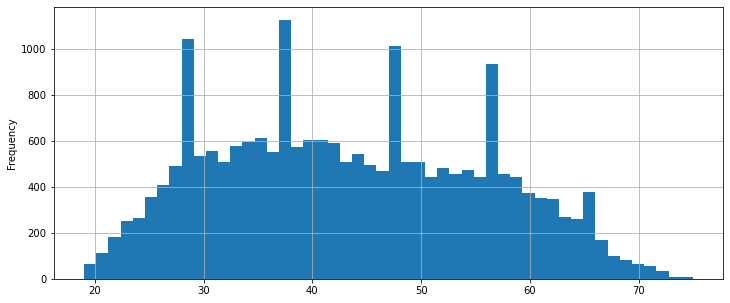

In [55]:
#построим для наглядности график
df['dob_years'].plot.hist(bins=50, grid=True,figsize=(12,5)); 

Определим до 24 лет - молодой возраст, от 25 до 45 средний, от 46 до 64  - старший, после 65 - пожилой. Создадим функцию, которая на вход получает значение из колонки с возрастом, а на выход отправляет возрастную категорию.

In [56]:
#Создание функции категоризации по возрасту
def age_group(age):
    if age <= 24:
        return 'молодой возраст'
    if 25 < age <= 45:
        return 'средний возраст'
    if 46 < age <= 64:
        return 'старший возраст'    
    return 'пожилой возраст'

In [57]:
#Применим функцию к столбцу "dob_years", получив дополнительный столбец "age_group" с возрастными категориями
df['age_group'] = df['dob_years'].apply(age_group)

In [58]:
#Посмотрим что вышло
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group,income_median
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,жилье,средний возраст,166571.732985
1,2,6929,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,свадьба,средний возраст,166571.732985
2,0,2369,33,высшее,0,гражданский брак,1,M,сотрудник,0,90410,недвижимость,средний возраст,166571.732985
3,0,529,28,высшее,0,женат / замужем,0,M,сотрудник,0,308848,недвижимость,средний возраст,166571.732985
4,1,717,26,высшее,0,женат / замужем,0,F,сотрудник,0,187863,недвижимость,средний возраст,166571.732985


В колонке "debt" отображается наличие задолженности по возврату кредитов сейчас либо в прошлом. Хорошо бы завести отдельные категории для надёжных заёмщиков и ненадёжных.

In [59]:
#Создание функции категоризации по надёжности заёмщика
def debt_group(deb):
    if deb == 0:
        return 'надёжный заёмщик'
    if deb == 1:
        return 'ненадёжный заёмщик'

In [60]:
#Применим функцию к столбцу "debt", получив дополнительный столбец "debt_group" с категориями заёмщиков
df['debt_group'] = df['debt'].apply(debt_group)

In [61]:
#Посмотрим что вышло
df.head(15)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group,income_median,debt_group
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,жилье,средний возраст,166571.732985,надёжный заёмщик
1,2,6929,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,свадьба,средний возраст,166571.732985,надёжный заёмщик
2,0,2369,33,высшее,0,гражданский брак,1,M,сотрудник,0,90410,недвижимость,средний возраст,166571.732985,надёжный заёмщик
3,0,529,28,высшее,0,женат / замужем,0,M,сотрудник,0,308848,недвижимость,средний возраст,166571.732985,надёжный заёмщик
4,1,717,26,высшее,0,женат / замужем,0,F,сотрудник,0,187863,недвижимость,средний возраст,166571.732985,надёжный заёмщик
5,0,3480,27,высшее,0,гражданский брак,1,F,сотрудник,0,92238,автомобиль,средний возраст,166571.732985,надёжный заёмщик
6,0,335,36,высшее,0,женат / замужем,0,M,сотрудник,0,414404,недвижимость,средний возраст,166571.732985,надёжный заёмщик
7,1,2252,44,высшее,0,женат / замужем,0,M,сотрудник,0,148992,автомобиль,средний возраст,166571.732985,надёжный заёмщик
8,0,726,43,высшее,0,Не женат / не замужем,4,F,сотрудник,0,140843,автомобиль,средний возраст,166571.732985,надёжный заёмщик
9,2,1574,35,высшее,0,женат / замужем,0,F,сотрудник,0,166571,жилье,средний возраст,166571.732985,надёжный заёмщик


Создадим категории дохода заёмщиков. Значений очень много, поэтому для наглядности не только воспользуемся методом .describe(), но и построим гистограмму.

In [62]:
#применяем describe, чтобы посмотреть внимательнее на то как распределены доходы среди заёмщиков
df[['total_income']].describe([.001,.1,.95]).T

,count,mean,std,min,0.1%,10%,50%,95%,max
total_income,21230.0,165556.089967,98559.903917,20667.0,29823.654,78731.3,143414.0,331929.85,2265604.0


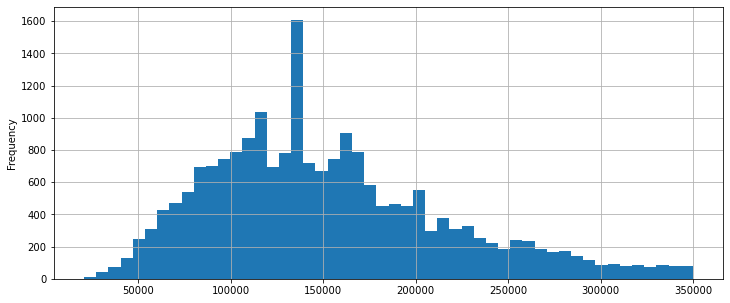

In [83]:
#график весьма полезен, ограничим его справа, поскольку людей с доходом в выше 350К в выборке немного
df.loc[df['total_income'] < 350000]['total_income'].plot.hist(bins=50, grid=True,figsize=(12,5)); 

Исходя из полученных данных разобъём доход на такие периоды: низкий < 50, 50 < ниже среднего < 100, 100 =< средний < 200, 200 < выше среднего < 300, высокий > 300K.

In [64]:
#Создание функции категоризации по доходу
def income_group(income):
    if income < 50000:
        return 'низкий'
    if 50000 <= income < 100000:
        return 'ниже среднего'
    if 100000 <= income < 200000:
        return 'средний'   
    if 200000 <= income < 300000:
        return 'выше среднего'   
    return 'высокий'

In [65]:
#Применим функцию к столбцу "total_income", получив дополнительный столбец "income_group" с категориями дохода
df['income_group'] = df['total_income'].apply(income_group)

In [66]:
#Проверим результат
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group,income_median,debt_group,income_group
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,жилье,средний возраст,166571.732985,надёжный заёмщик,выше среднего
1,2,6929,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,свадьба,средний возраст,166571.732985,надёжный заёмщик,ниже среднего
2,0,2369,33,высшее,0,гражданский брак,1,M,сотрудник,0,90410,недвижимость,средний возраст,166571.732985,надёжный заёмщик,ниже среднего
3,0,529,28,высшее,0,женат / замужем,0,M,сотрудник,0,308848,недвижимость,средний возраст,166571.732985,надёжный заёмщик,высокий
4,1,717,26,высшее,0,женат / замужем,0,F,сотрудник,0,187863,недвижимость,средний возраст,166571.732985,надёжный заёмщик,средний
5,0,3480,27,высшее,0,гражданский брак,1,F,сотрудник,0,92238,автомобиль,средний возраст,166571.732985,надёжный заёмщик,ниже среднего
6,0,335,36,высшее,0,женат / замужем,0,M,сотрудник,0,414404,недвижимость,средний возраст,166571.732985,надёжный заёмщик,высокий
7,1,2252,44,высшее,0,женат / замужем,0,M,сотрудник,0,148992,автомобиль,средний возраст,166571.732985,надёжный заёмщик,средний
8,0,726,43,высшее,0,Не женат / не замужем,4,F,сотрудник,0,140843,автомобиль,средний возраст,166571.732985,надёжный заёмщик,средний
9,2,1574,35,высшее,0,женат / замужем,0,F,сотрудник,0,166571,жилье,средний возраст,166571.732985,надёжный заёмщик,средний


В таблице присутствует категоризация по колонкам "education" и "family_status". Каждой из них поставлена в соотвествие колонка "education_id" и "family_status_id". С помощью дублирующих колонок с номерами статусов можно проводить группировки даже в случае неявных дубликатов, как было поначалу в колонке "education_id". 
Создадим словари для этих колонок, возможно они пригодятся в дальнейшем.

In [67]:
#Создание словаря для колонки "education"
education_dict = pd.Series(df['education'].unique(), index=df['education_id'].unique()).to_dict()
print(education_dict)

{0: 'высшее', 1: 'среднее', 2: 'неоконченное высшее', 3: 'начальное', 4: 'ученая степень'}


In [68]:
#Создание словаря для колонки  "family_status"
family_dict = pd.Series(df['family_status'].unique(), index=df['family_status_id'].unique()).to_dict()
print(family_dict)

{0: 'женат / замужем', 1: 'гражданский брак', 4: 'Не женат / не замужем', 2: 'вдовец / вдова', 3: 'в разводе'}


**Вывод**

Была проведена категоризация данных по возрасту, доходу и по надёжности заёмщиков. Благодаря этому сгруппированные данные будут отображаться более наглядно. 
Для колонок "education" и "family_status" были созданы явные словари из их "колонок-компаньонов" это может пригодится в дальнейшем. При категоризации по возрасту было замечено, что в таблице людей обозначенных по колонке "income_type" как пенсионеры, но по колонке "dob_years" значительно младше 65 лет - абсолютное большинство, поэтому возрастной статус "пенсионер" было решено заменить на "пожилой возраст". 

## Ответы на вопросы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

In [69]:
#Агрегируем с помощью pivot_table данные и выведем данные как суммы количества должников и доли от общего числа
df.pivot_table(index = 'children', values = 'debt', aggfunc = ['count','sum','mean'] )

,count,sum,mean
,debt,debt,debt
children,,,
0,14021,1058,0.075458
1,4792,441,0.092028
2,2039,194,0.095145
3,328,27,0.082317
4,41,4,0.097561
5,9,0,0.000000


In [70]:
#Выведем ту же информацию в более удобном виде: количество детей - процент должников
children_debt = df.pivot_table(index = 'children',values = 'debt', aggfunc = lambda x: '{:.2%} '.format(x.mean()))
#Вывод таблицы с сортировкой по доле ненадёжных заёмщиков
children_debt.sort_values(by='debt', ascending=False)

,debt
children,
4,9.76%
2,9.51%
1,9.20%
3,8.23%
0,7.55%
5,0.00%


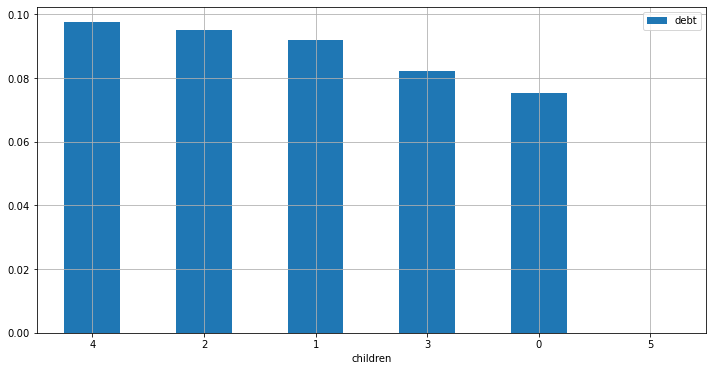

In [89]:
#И построим график для наглядности
(df[['children','debt',]].groupby(['children'])
 .mean()
 .sort_values(by='debt', ascending=False)
 .plot.bar(grid=True, figsize=(12,6),rot=0)
);

**Вывод**

Зависимость между наличием детей и возвратом кредита в срок существует. 

Семьи с 5-ю детьми, согласно таблице, самые надёжные заёмщики - 100% отсутствие задолженности. Однако это сильно похоже на выброс, поскольку вся выборка состоит из 9 семей и данные по должникам сильно отличаются от остальных групп. Так что, скорей всего самые надёжные заёмщики - бездетные - 7.55% должников, но рождение первого ребёнка обваливает надёжность заёмщиков, увеличивая количество должников до 9.55%. 
    
Надёжность заёмщиков продолжает снижаться вместе с ростом количества детей и процент должников при рождении 4-го ребёнка достигает 9,76%. Единственное нарушение ряда - семьи с тремя детьми. Согласно выборке, надёжность таких заёмщиков резко вырастает и по рейтингу идёт на следующем месте после бездетных.

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [72]:
#Агрегируем с помощью pivot_table данные и выведем данные как суммы количества должников и доли от общего числа
df.pivot_table(index = 'family_status', values = 'debt', aggfunc = ['count','sum','mean'] )

,count,sum,mean
,debt,debt,debt
family_status,,,
Не женат / не замужем,2780,272,0.097842
в разводе,1179,84,0.071247
вдовец / вдова,946,62,0.065539
гражданский брак,4112,383,0.093142
женат / замужем,12213,923,0.075575


In [73]:
#Выведем ту же информацию в более удобном виде: семейный статус - процент должников
family_debt = df.pivot_table(index = 'family_status',values = 'debt', aggfunc = lambda x: '{:.2%} '.format(x.mean()))
#Вывод таблицы с сортировкой
family_debt.sort_values(by='debt', ascending=False)

,debt
family_status,
Не женат / не замужем,9.78%
гражданский брак,9.31%
женат / замужем,7.56%
в разводе,7.12%
вдовец / вдова,6.55%


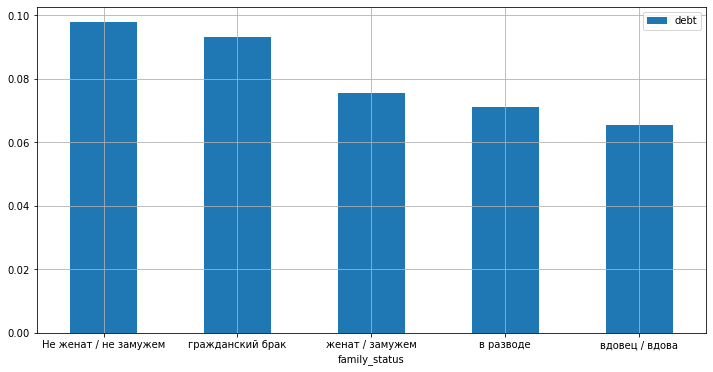

In [91]:
#И построим график для наглядности
(df[['family_status','debt',]]
 .groupby(['family_status'])
 .mean()
 .sort_values(by='debt', ascending=False)
 .plot.bar(grid=True, figsize=(12,6),rot=0)
);

**Вывод**

Согласно обработанным данным можно сказать, что зависимость между семейным положением также существует. Самые надёжные заёмщики - люди потерявшие супруга или супругу, процент невозврата долга 6,55%. Также сравнительно хорошо отдают долги разведённые пары. На третьем месте супруги в законном браке. Но, согласно нашим данным, если люди живут вместе без обязательств или сами по себе, процент возврата долгов сильно снижается. Возможно по причине излишней легкомысленности проблемы с долгами имеют 9.78% таких заёмщиков.

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [76]:
#Агрегируем с помощью pivot_table данные и выведем данные как суммы количества должников и доли от общего числа
df.pivot_table(index = 'income_group', values = 'debt', aggfunc = ['count','sum','mean'] )

,count,sum,mean
,debt,debt,debt
income_group,,,
высокий,1470,106,0.072109
выше среднего,3717,256,0.068873
ниже среднего,4052,330,0.081441
низкий,369,23,0.062331
средний,11622,1009,0.086818


In [77]:
#Выведем ту же информацию в более удобном виде: уровень дохода - процент должников
income_debt = df.pivot_table(index = 'income_group',values = 'debt', aggfunc = lambda x: '{:.2%} '.format(x.mean()))
#Вывод таблицы с сортировкой
income_debt.sort_values(by='debt', ascending=False)

,debt
income_group,
средний,8.68%
ниже среднего,8.14%
высокий,7.21%
выше среднего,6.89%
низкий,6.23%


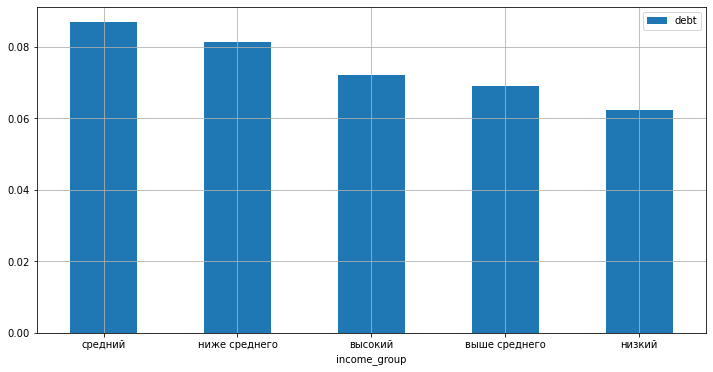

In [92]:
#И построим график для наглядности
(df[['income_group','debt',]]
 .groupby(['income_group'])
 .mean()
 .sort_values(by='debt', ascending=False)
 .plot.bar(grid=True, figsize=(12,6),rot=0)
);

**Вывод**

Безусловно, зависимость от уровня дохода и возврата долга также существует.
Вопреки расхожему мнению, люди с низкими доходами лучше отдают кредиты (согласно предоставленной выборке, конечно) среди них находится 6.23% проблемных заёмщиков. За ними идут - люди с доходами выше среднего и высокими доходами. Очевидно, они умеют считать деньги. 
Хуже всех отдают долги люди со средним доходом. Возможно они хотят казаться людьми с доходами выше среднего, но у 8.61%  из них не хватает терпения и расчёта, увы.

- Как разные цели кредита влияют на его возврат в срок?

In [79]:
#Агрегируем с помощью pivot_table данные и выведем данные как суммы количества должников и доли от общего числа
df.pivot_table(index = 'purpose', values = 'debt', aggfunc = ['count','sum','mean'] )

,count,sum,mean
,debt,debt,debt
purpose,,,
автомобиль,4258,397,0.093236
жилье,4413,306,0.069341
недвижимость,6290,471,0.074881
образование,3970,369,0.092947
свадьба,2299,181,0.078730


In [80]:
#Выведем ту же информацию в более удобном виде: цель кредита - процент должников
purpose_debt = df.pivot_table(index = 'purpose',values = 'debt', aggfunc = lambda x: '{:.2%} '.format(x.mean()))
#Вывод таблицы с сортировкой
purpose_debt.sort_values(by='debt', ascending=False)

,debt
purpose,
автомобиль,9.32%
образование,9.29%
свадьба,7.87%
недвижимость,7.49%
жилье,6.93%


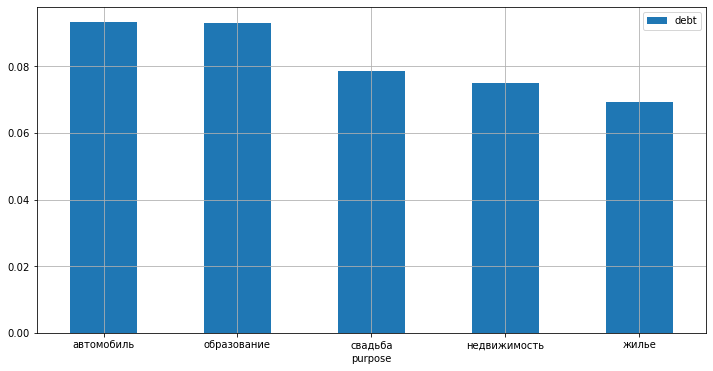

In [93]:
#И построим график для наглядности
(df[['purpose','debt',]]
 .groupby(['purpose'])
 .mean()
 .sort_values(by='debt', ascending=False)
 .plot.bar(grid=True, figsize=(12,6),rot=0)
);

**Вывод**

Зависимость между целями кредита и возвратом средств существует. Люди приобретающие жильё, с большей ответственностью возвращают ипотечные средства, чем остальные заёмщики. Неудивительно, оказаться на улице не хочется никому,  кроме 6.93% таких заёмщиков. 

На втором месте - люди декларирующие своей целью приобретение недвижимости. В некоторых случаях было указано конкретно, что недвижимость коммерческая, однако было решено несколько упростить категории, поскольку в тех случаях, когда не было указано что недвижимость коммерческая, это никак не гарантировало однозначного использования недвижимости как жилой, это мог быть магазин или гостиница. Излишне подробная группировка на основании предположений могла исказить результаты в ту или иную сторону. 

Следующими в рейтинге идут счастливые молодожёны. Они пока не так умеют обращаться с деньгами, как люди решившиеся на ипотеку, однако у них ещё всё впереди. Странным является то, что на предпоследнем месте оказались люди вложившие средства в получение образования. Возможно плохая ситуация на рынке труда либо переоценка своих возможностей сыграли с ними злую шутку, но как из песни, из датасета всех значений не выкинешь. 

На последнем месте идут люди необдуманно взявшие в кредит слишком дорогой для них автомобиль.  Таких заёмщиков набралось 9.32%.

## Общий вывод

Согласно датасету наличие детей, семейное положение, уровень дохода и цель кредита отражаются на вероятности возврата в срок средств по кредиту. При этом упрощая можно сказать следующее  - бездетные люди возвращают долги чаще, чем те, у кого есть дети.
7.55% должников среди бездетных против 9.76% у тех, кто растит 4-х детей. Единственное исключение - семьи с 3-мя детьми, они идут на следующем месте после бездетных по надёжности.

В то же время люди находящиеся в браке или с опытом развода в среднем лучше справляются с возвращением кредитов, в отличие от 9.78% неженатых заёмщиков либо 9.31% должников, проживающих в гражданском браке. Хотя и не так хорошо как вдовцы, среди которых ненадёжных заёмщиков всего 6.55%. Возможно для людей потерявших супруга следует выпустить отдельный кредитный продукт. 

Как ни странно, люди с низким уровнем дохода лучше всех возвращают кредиты  - 6.23% случаев задолженности. То ли мы наблюдаем выборку лучших из лучших, кто не пошёл брать "быстроденьги" в ближайший ларёк возле игровых автоматов, либо они ещё не брали кредитов. Также в рейтинге сравнительно хорошо возвращают кредиты люди с высокими доходами и доходами выше среднего. Значит, они кроме зарабатывания, умеют хорошо распоряжаться деньгами. А вот заёмщики со средним и доходами ниже среднего находятся в аутсайдерах, с вызывающими озабоченность 8.61% должников, если различие в 1% - 1,5% с ближайшими соседями в рейтинге делает их таковыми. 

В разрезе целей кредита, люди берущие в кредит жильё либо недвижимость для других целей - самые дисциплинированные заёмщики,  6.93% случаев задолженности. Посредине рейтинга - молодожёны. Возможно им удаётся неплохо выглядеть в статистике  банка за счёт денежных подарков от гостей. А вот, как ни странно, банку стоит побеспокоится о возврате кредитов выданных на образование. Хотя, казалось бы, человек взявший целевой кредит на улучшение своей привлекательности на рынке труда должен быть дисциплинированным заёмщиком. Впрочем, мы не знаем на какое именно образование были взяты кредиты, поэтому сложно делать настолько далеко идущие выводы. Ну, а лидерами неплательщиков в категории целей кредита закономерно выступают автомобилисты, Из них 9.32% не смогли вовремя оплатить свою дорогостоящую покупку.